In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Walmart DataSet.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Data Overview
df.shape


(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


ValueError: could not convert string to float: '05-02-2010'

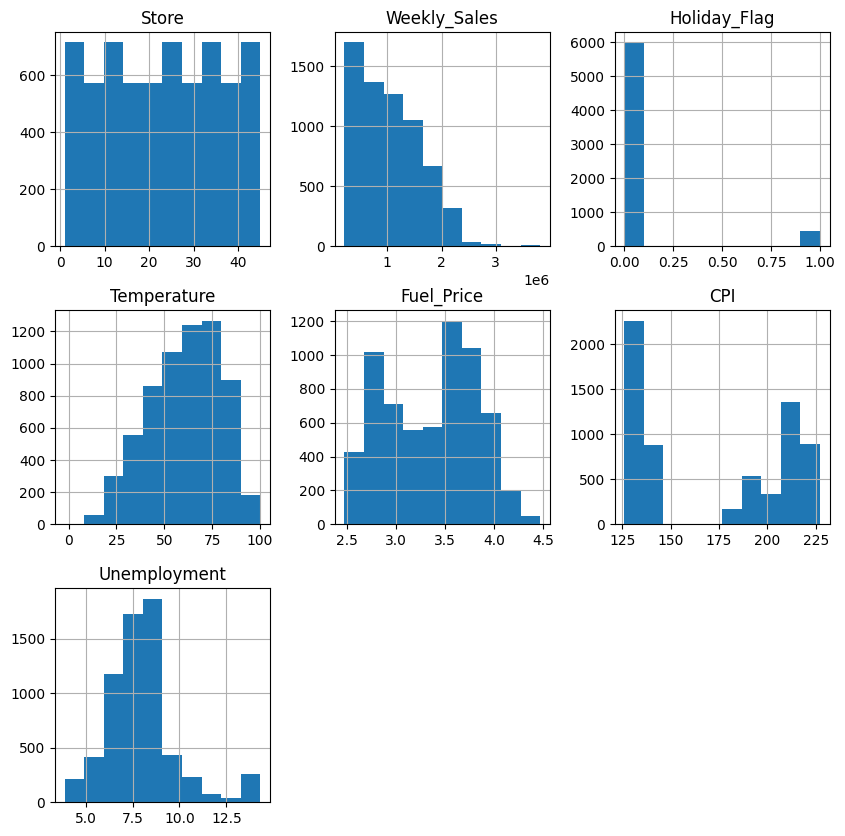

In [ ]:
# Numerical Features EDA
df.hist(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<Axes: >

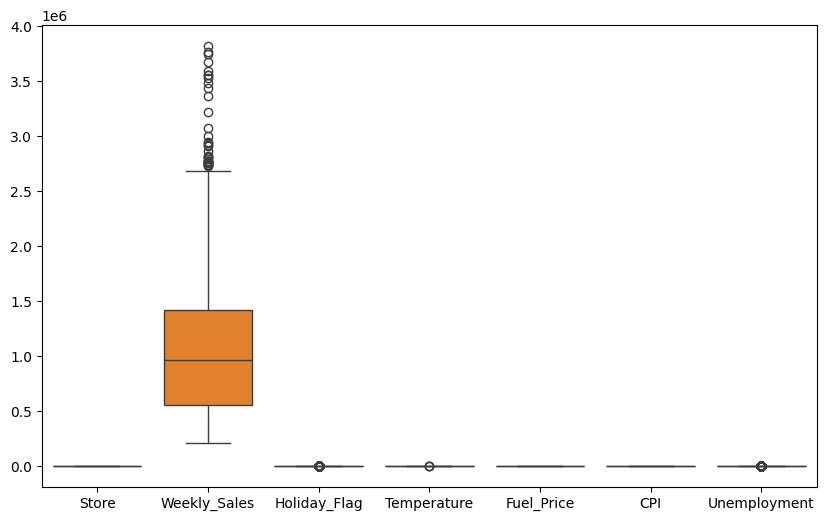

In [ ]:
#Outlier Analysis:
plt.figure(figsize=(10,6))
sns.boxplot(data = df)

<Axes: ylabel='Weekly_Sales'>

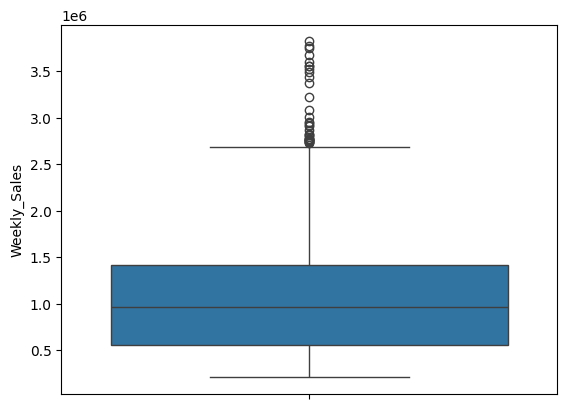

In [ ]:
#  for a specific column
sns.boxplot(y=df['Weekly_Sales'])


 You are provided with the weekly sales data for their various outlets. Use statistical
# analysis, EDA, outlier analysis, and handle the missing values to come up with various
# insights that can give them a clear perspective on the following:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
# b. If the weekly sales show a seasonal trend, when and what could be the reason?
# c. Does temperature affect the weekly sales in any manner?
# d. How is the Consumer Price index affecting the weekly sales of various stores?
# e. Top performing stores according to the historical data.
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.


In [ ]:
# Handling Missing Values (if any)
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['Fuel_Price'] = df['Fuel_Price'].fillna(df['Fuel_Price'].mean())
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())


In [ ]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation between Weekly Sales and Unemployment: {correlation}")


Correlation between Weekly Sales and Unemployment: -0.10617608965795429


In [ ]:
# Stores suffering most from unemployment (e.g., top 5)
unemployment_impact = df.groupby('Store')['Weekly_Sales'].corr(df['Unemployment'])
print("Stores most affected by unemployment:")
print(unemployment_impact.sort_values(ascending=True).head())


Stores most affected by unemployment:
Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
Name: Weekly_Sales, dtype: float64


In [ ]:
# b. Seasonal Trend in Weekly Sales
# Convert Date to datetime and create new features for analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=monthly_sales)
plt.title('Seasonal Trend of Weekly Sales')
plt.show()

ValueError: time data "19-02-2010" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

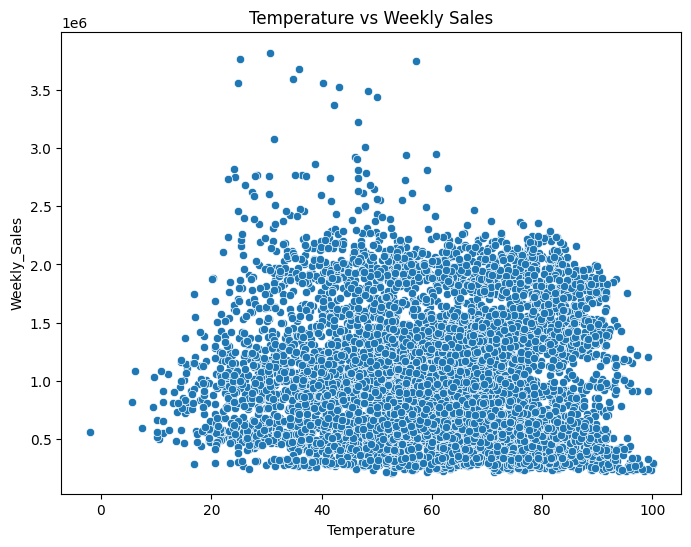

Correlation between Weekly Sales and Temperature: -0.06381001317946956


In [ ]:
#c. Temperature vs Weekly Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Temperature vs Weekly Sales')
plt.show()
correlation = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Weekly Sales and Temperature: {correlation}")

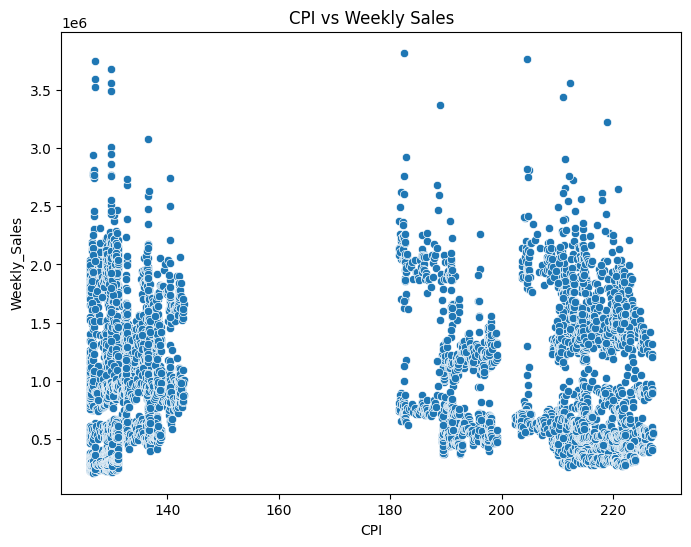

Correlation between Weekly Sales and CPI: -0.07263416204017631


In [ ]:

# d. Consumer Price Index vs Weekly Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('CPI vs Weekly Sales')
plt.show()
correlation = df['Weekly_Sales'].corr(df['CPI'])
print(f"Correlation between Weekly Sales and CPI: {correlation}")

In [ ]:

# e. Top Performing Stores
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
print("Top Performing Stores:")
print(top_stores)

Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
#f. Worst Performing Store and Difference
worst_store = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
worst_sales = df.groupby('Store')['Weekly_Sales'].sum().min()
best_sales = df.groupby('Store')['Weekly_Sales'].sum().max()
sales_difference = best_sales - worst_sales
print(f"Worst performing store: {worst_store}, Total sales:{worst_sales}")
print(f"Difference between highest and lowest performing stores: {sales_difference}")

Worst performing store: 33, Total sales:37160221.96
Difference between highest and lowest performing stores: 264237570.49999997


In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Store'] = le.fit_transform(df['Store'])

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,0,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,0,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,0,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,0,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,44,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,44,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,44,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,44,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:

# Prepare data for modeling
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred

array([1159193.6457, 1406847.0734, 1846858.6289, ...,  774162.4151,
       1895456.3784,  819104.7663])

In [ ]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

TypeError: got an unexpected keyword argument 'squared'

In [ ]:

# Evaluate the model (calculate RMSE manually)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 147279.99133485515


In [ ]:
# Forecast sales for the next 12 weeks for each store
# Create a DataFrame for the future weeks (assuming your feature engineering remains the same)
future_weeks = 12
future_data = X.tail(1).copy()



In [ ]:
forecasted_sales = []
for _ in range(future_weeks):
  future_prediction = rf_model.predict(future_data[['Store', 'Holiday_Flag', 'Temperature',
                                                    'Fuel_Price', 'CPI', 'Unemployment']])
  forecasted_sales.append(future_prediction[0])

forecast_df = pd.DataFrame({'Forecasted_Sales': forecasted_sales})
forecast_df = pd.DataFrame({'Forecasted_Sales': forecasted_sales})




In [ ]:
forecast_df = pd.DataFrame({'Forecasted_Sales': forecasted_sales})
forecast_df

,Forecasted_Sales
0,741544.3211
1,741544.3211
2,741544.3211
3,741544.3211
4,741544.3211
5,741544.3211
6,741544.3211
7,741544.3211
8,741544.3211
9,741544.3211


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize and train a DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Evaluate the model
rmse_dt = mean_squared_error(y_test, y_pred)
print(f"Decision Tree RMSE: {rmse_dt}")


Decision Tree RMSE: 21691395847.595005


In [ ]:
forecasted_sales_dt = []
for _ in range(future_weeks):
  future_prediction_dt = dt_model.predict(future_data[['Store', 'Holiday_Flag', 'Temperature',
                                                    'Fuel_Price', 'CPI', 'Unemployment']])
  forecasted_sales_dt.append(future_prediction_dt[0])

forecast_df_dt = pd.DataFrame({'Forecasted_Sales_DT': forecasted_sales_dt})
forecast_df_dt

,Forecasted_Sales_DT
0,760281.43
1,760281.43
2,760281.43
3,760281.43
4,760281.43
5,760281.43
6,760281.43
7,760281.43
8,760281.43
9,760281.43


In [ ]:
# Initialize and train a DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_pred_dt

array([1087507.47, 1352039.88, 1834680.25, ...,  656988.64, 1750197.81,
        767256.53])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:

r2 = r2_score(y_test, y_pred)
r2

0.9326677370775218